<a href="https://colab.research.google.com/github/eTcilopp/temp_python_intro_course_gb/blob/master/a_b_testing/Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 6<br>
## Задача 1
Продакт на главной mail.ru решил протестировать в рекомендательной ленте контента вместо карточек со статьями<br> видеоплеер с короткими видео. Нынешний таймспент на юзера в день в среднем равен 25 минут,<br> а стандартная ошибка (SD) равна 156.<br> Мы предполагаем, что в новой версии таймспент на юзера в день изменится на 10%. <br>Средний трафик 20000 человек в день. <br>Посчитайте сколько дней необходимо держать эксперимент при alpha = 5% и beta = 20% .

Решение<br>
Воспользуемся калькулятором [Sample Size Calculator for Comparing Two Independent Means](https://statulator.com/SampleSize/ss2M.html)<br>
Имеем<br>
среднее для референтной группы = 25<br>
среднее для тестовой группы = 25 + 10% = 27,5
стандартное отклонение

In [7]:
import math
from statsmodels.stats.power import TTestIndPower


current_timespent = 25
expected_gain = 0.1
std_dev = 156
alpha = 0.05
beta = 0.2

# Инициализация объекта для расчета мощности теста
power_analysis = TTestIndPower()

# Расчет размера выборки
effect_size = (current_timespent * expected_gain) / std_dev
required_sample_size = power_analysis.solve_power(effect_size=effect_size,
                                                  alpha=alpha,
                                                  power=1-beta,
                                                  ratio=1,
                                                  alternative='two-sided')

print(f'Требуемый размер выборки = {round(required_sample_size)}')



Требуемый размер выборки = 61124


Т.е. нам нужно 61124 * 2 пользователей (61124 для базовой группы и 61124 для тестовой)

In [9]:
average_visits_per_day = 20000
users_required = required_sample_size * 2
days_of_experiment = users_required / average_visits_per_day
print(f'Необходимо `держать` эксперимент {math.ceil(days_of_experiment)} дней')

Необходимо `держать` эксперимент 7 дней


## Задача 2
Наша продуктовая команда в ecommerce магазине планирует запустить тест,<br>направленный на ускорение загрузки сайта.<br> Одна из основных метрик bounce rate в GA = 40%. Мы предполагаем, <br>что при оптимизации сайта она изменится минимум на 20%.<br>Средний трафик 4000 человек в день.
<br> Посчитайте сколько нам нужно дней держать эксперимент при alpha = 5% и beta = 20%

Решение. <br>
Воспользуемся онлайн-калькулятором для определения размера выборки для доли.<br>
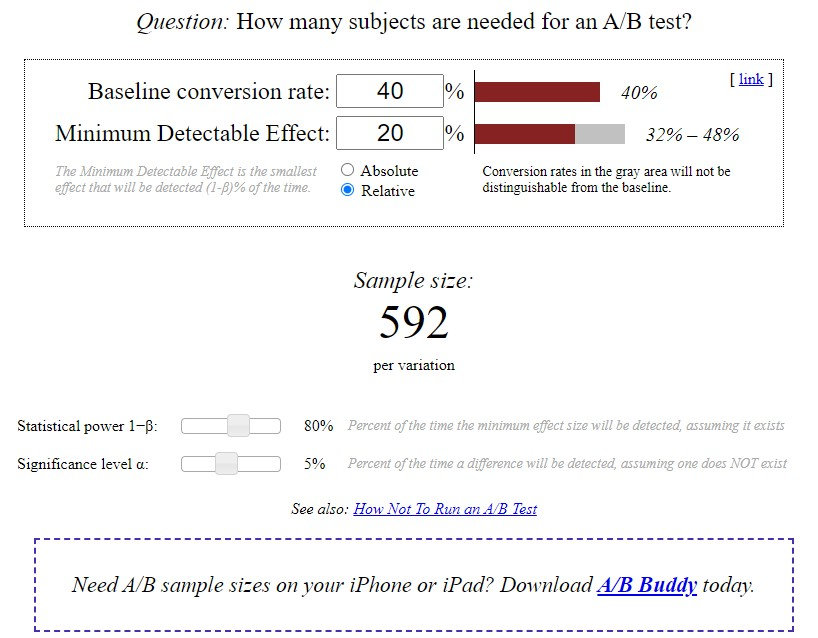


Полученное значение равно 592. Рассчитаем число дней для эксперимента при заданном дневном трафике:

In [10]:
sample_size = 592
total_visits_needed = sample_size * 2
day_trafic = 4000
days_needed = math.ceil(total_visits_needed/day_trafic)
print(f'Требуется {days_needed} дней эксперимента')

Требуется 1 дней эксперимента
